# Code

In [1]:
import pathlib
from ipywidgets import interact, Select, Text, IntSlider
import nanopore_event
from tqdm.notebook import tqdm

def event_list(path: str):
    event_dir = pathlib.Path(path)
    return list(event_dir.iterdir())

def filter_events(event_filter, event_list):
    filtered_events = [event for event in tqdm(event_list, desc="Filtering") if event_filter(event)]
    print(f"{len(filtered_events)}/{len(event_list)}: {int(len(filtered_events)/len(event_list)*100)}%")
    return filtered_events

def plot_scatter(event_filter):
    all_events = event_list(events_path.value)
    filtered_events = filter_events(event_filter, all_events)
    nanopore_event.AllEvent(all_events).scatter_dwelltime_maxcurrent(threshold=-6500, right=1000)
    nanopore_event.AllEvent(filtered_events).scatter_dwelltime_maxcurrent(threshold=-6500, right=1000)

def plot_event(event_path):
    event = nanopore_event.Event(event_path)
    event.plot()
    
def plot_opt_event(event_path, Kmax=5):
    event = nanopore_event.Event(event_path)
    event.plot_opt(Kmax=Kmax)
    

# Directory Selection

In [2]:
events_path = Text(value = "./output/events", placeholder="./output/events")
display(events_path)

Text(value='./output/events', placeholder='./output/events')

# K_max

In [3]:
Kmax = IntSlider(value=5, min=1, max=10, step=1, description="Kmax")
display(Kmax)

IntSlider(value=5, description='Kmax', max=10, min=1)

# Filter Selection

In [4]:
all_filter = lambda event_path: True
threshold_filter = lambda event_path: nanopore_event.Event(event_path).max_current()>-4000

def n_peak_filter(n):
    return lambda event_path: nanopore_event.Event(event_path).count_peak(Kmax=Kmax.value) == n

filter_dict = {"All": all_filter, "Threshold: >-4000": threshold_filter, "Two Peak": n_peak_filter(2)}
filter_widget = Select(options=filter_dict)
display(filter_widget)

Select(options={'All': <function <lambda> at 0x7f999a51fe20>, 'Threshold: >-4000': <function <lambda> at 0x7f9…

# Scatter Plot

Filtering:   0%|          | 0/399 [00:00<?, ?it/s]

399/399: 100%


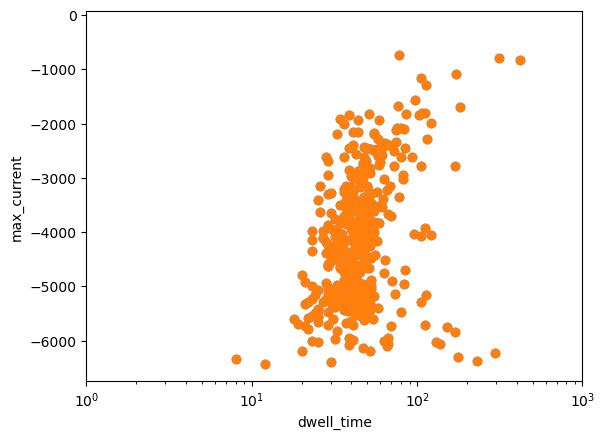

In [5]:
plot_scatter(filter_widget.value)

# Event Plot

In [8]:
def plot(event_csv, use_model):
    if use_model:
        plot_opt_event(event_csv, Kmax=Kmax.value)
    else:
        plot_event(event_csv)
        
interact(plot, event_csv = filter_events(filter_widget.value, event_list(events_path.value)), use_model=True)

Filtering:   0%|          | 0/399 [00:00<?, ?it/s]

284/399: 71%


interactive(children=(Dropdown(description='event_csv', options=(PosixPath('output/events/event_00001421.csv')…

<function __main__.plot(event_csv, use_model)>